# MACHINE LEARNING IN FIFA ULTIMATE TEAM 22

### FELIPE BASURTO *@felipebasurto*

For this machine learning project, I have chosen to work with a dataset of FIFA Ultimate Team 22 players since i have always been a huge fan of the game.

I want to create a program that can predict each player's average rating based on their individual characteristics. This type of project can be very interesting because it will allow me to apply machine learning techniques and data analysis to understand how different player characteristics impact their performance.

Additionally, the final result of the project could be useful for FIFA Ultimate Team users who want to make informed decisions about which players to include in their teams.

At the very end of this notebook there is a complete predictor, where inputting the individual stats will give you the predicted overall, the actual overall and the name of the player, making use of pandasql, another cool library that i had the oportunity to try here for the first time.

In [1]:
#Imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import pandasql as ps

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')
import plotly.express as px


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Loading the players dataset
We want to load the .csv file into a dataframe that we are able to work with.

With the `head` method, we can see how the first five rows of our dataframe look like

In [2]:
def load_train_data():
    return pd.read_csv("players_22.csv")

player_data = load_train_data()

In [3]:
player_data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
player_data.shape

(19239, 110)

# Data Cleaning

We are able to observe from the dataset that there are a lot of columns that are useless for us, giving that we are only need the stats of the player.

It is more than possible to clear and structure our data in python in the following way:

In [5]:
#Columns with the player stats
columns = ["long_name","overall", "pace", "passing","shooting", "dribbling","defending","physic"]
statcolumns = ["pace", "passing","shooting", "dribbling","defending","physic"]

player_df = player_data[columns]
player_df.head()

,long_name,overall,pace,passing,shooting,dribbling,defending,physic
0,Lionel Andrés Messi Cuccittini,93,85.0,91.0,92.0,95.0,34.0,65.0
1,Robert Lewandowski,92,78.0,79.0,92.0,86.0,44.0,82.0
2,Cristiano Ronaldo dos Santos Aveiro,91,87.0,80.0,94.0,88.0,34.0,75.0
3,Neymar da Silva Santos Júnior,91,91.0,86.0,83.0,94.0,37.0,63.0
4,Kevin De Bruyne,91,76.0,93.0,86.0,88.0,64.0,78.0


Using the `info` method, we can get an idea about the content of our dataframe and how is it structuresql_dataframe.

We can get an statistical description of our data with the `describe` method

In [6]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   long_name  19239 non-null  object 
 1   overall    19239 non-null  int64  
 2   pace       17107 non-null  float64
 3   passing    17107 non-null  float64
 4   shooting   17107 non-null  float64
 5   dribbling  17107 non-null  float64
 6   defending  17107 non-null  float64
 7   physic     17107 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.2+ MB


In [7]:
player_df.describe()

,overall,pace,passing,shooting,dribbling,defending,physic
count,19239.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000
mean,65.772182,68.213071,57.312562,52.345297,62.561174,51.703630,64.823289
std,6.880232,10.933155,10.068965,14.051623,9.651312,16.189746,9.791886
min,47.000000,28.000000,25.000000,18.000000,27.000000,14.000000,29.000000
25%,61.000000,62.000000,51.000000,42.000000,57.000000,37.000000,59.000000
50%,66.000000,69.000000,58.000000,54.000000,64.000000,56.000000,66.000000
75%,70.000000,76.000000,64.000000,63.000000,69.000000,64.000000,72.000000
max,93.000000,97.000000,93.000000,94.000000,95.000000,91.000000,90.000000


#### This a way more visual way to see and understand our data (`matplotlib.plot`)

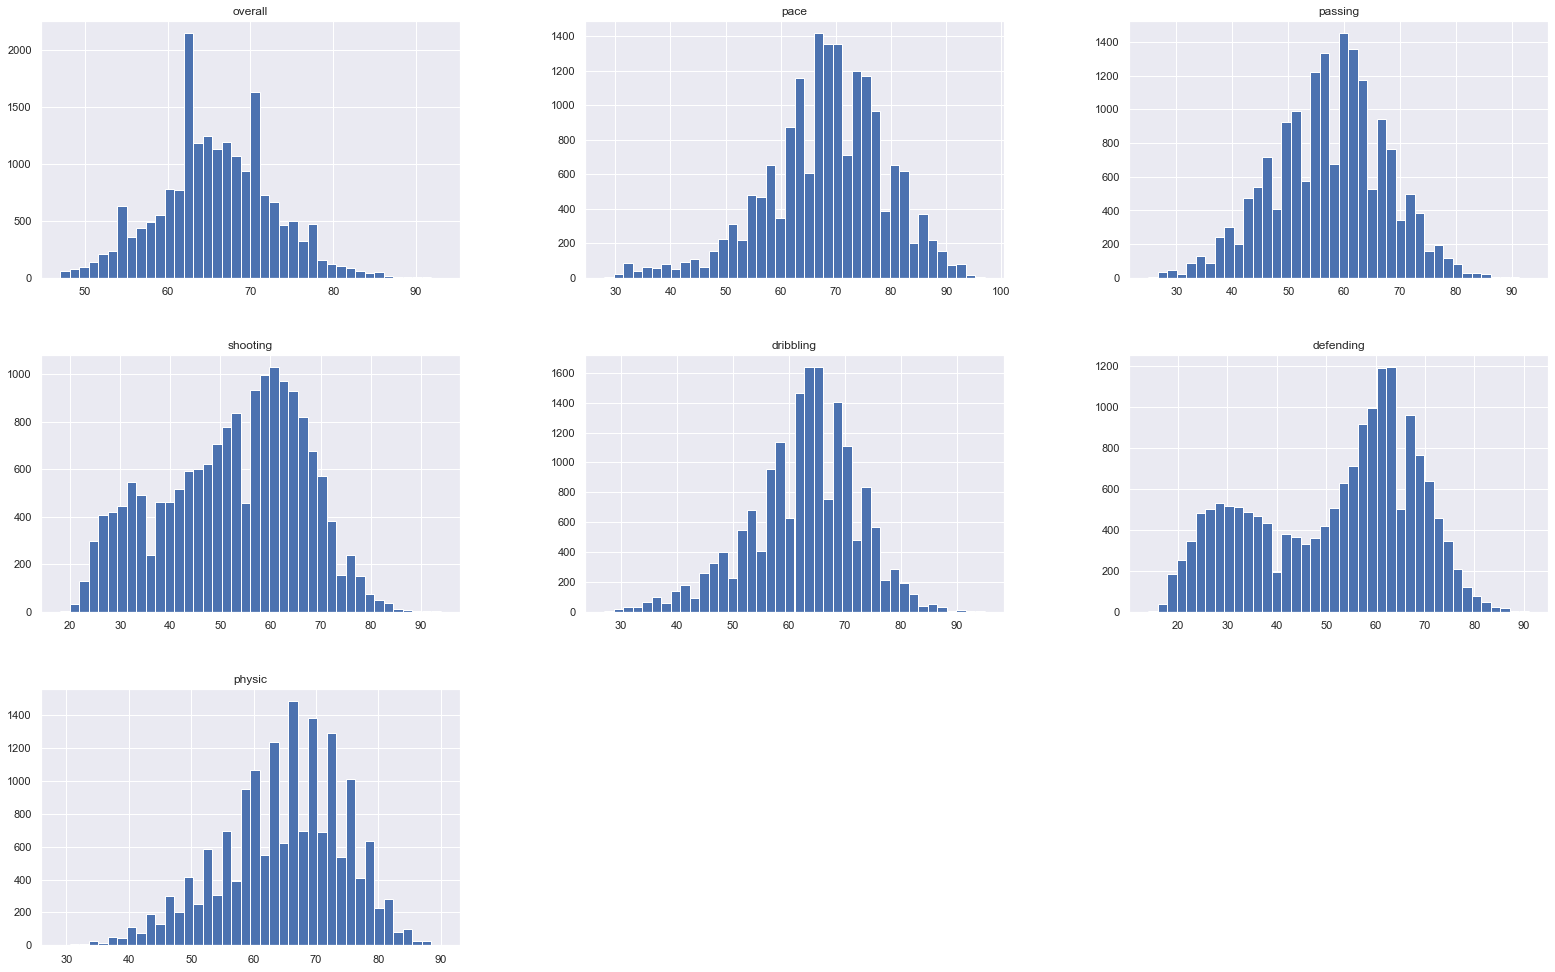

In [8]:
player_df.hist(bins=40, figsize=(27,17))
plt.show()

---------------------

#### Lets continue and, just in case, check if we have values that are missing with `isna().any()`

Looks like there are some players with empty cells (Goalkeepers have a whole different set of stats, and some other players that do not exist in FUT)

So let's go ahead and drop those rows from our Dataframe

In [9]:
player_df.dropna(inplace = True)
player_df.isna().any()

long_name    False
overall      False
pace         False
passing      False
shooting     False
dribbling    False
defending    False
physic       False
dtype: bool

##### As we are able to see, all columns now are set to False, which means that there are no rows with empty cells. (Remember we took out the GKs and players not available in FUT)

In [10]:
player_df.shape

(17107, 8)

## Splitting the Data into Training and Testing Sets

We can either split the data ourselves, or make use of a super cool function that scikit-learn has for us that does the same job. 

`train_test_split` takes as arguments our dataframe, the size of the training set that we want to use, and the last number corresponds to the seed that the RNG will use.

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(player_df, test_size=0.2, random_state=42)

print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(player_df))

Length of training data: 13685
Length of testing data: 3422
Length of total data: 17107


### Looking for correlations
It is always a good practice to check for correlations before training our model. With `.corr()` we are able to do so

In [12]:
fifa_df = train_set.copy()
corr_matrix = fifa_df.corr()
corr_matrix

,overall,pace,passing,shooting,dribbling,defending,physic
overall,1.000000,0.177645,0.714538,0.488308,0.667380,0.343988,0.529021
pace,0.177645,1.000000,0.257869,0.327773,0.497774,-0.296059,-0.195309
passing,0.714538,0.257869,1.000000,0.658439,0.846456,0.175459,0.165687
shooting,0.488308,0.327773,0.658439,1.000000,0.777154,-0.410085,0.016828
dribbling,0.667380,0.497774,0.846456,0.777154,1.000000,-0.125695,0.022326
defending,0.343988,-0.296059,0.175459,-0.410085,-0.125695,1.000000,0.533748
physic,0.529021,-0.195309,0.165687,0.016828,0.022326,0.533748,1.000000


This is how all numeric values correlate with the overall, we can observe that, supposedly, passing seems like the stat that has the most to do with overall.

This means that overall tends to go up when the passing stat is high. In the other hand, the pace stat, almost has nothing to do with the overall of a player

In [13]:
corr_matrix['overall'].sort_values(ascending=False)

overall      1.000000
passing      0.714538
dribbling    0.667380
physic       0.529021
shooting     0.488308
defending    0.343988
pace         0.177645
Name: overall, dtype: float64




#### Again, here we have a more visual way to see correlations
This function plots every numerical attribute against every other numerical attributes. 
The more linear the correlation graph is, the stronger it is. So lets take a more detailed look into the most strong stats such as dribbling and passing.

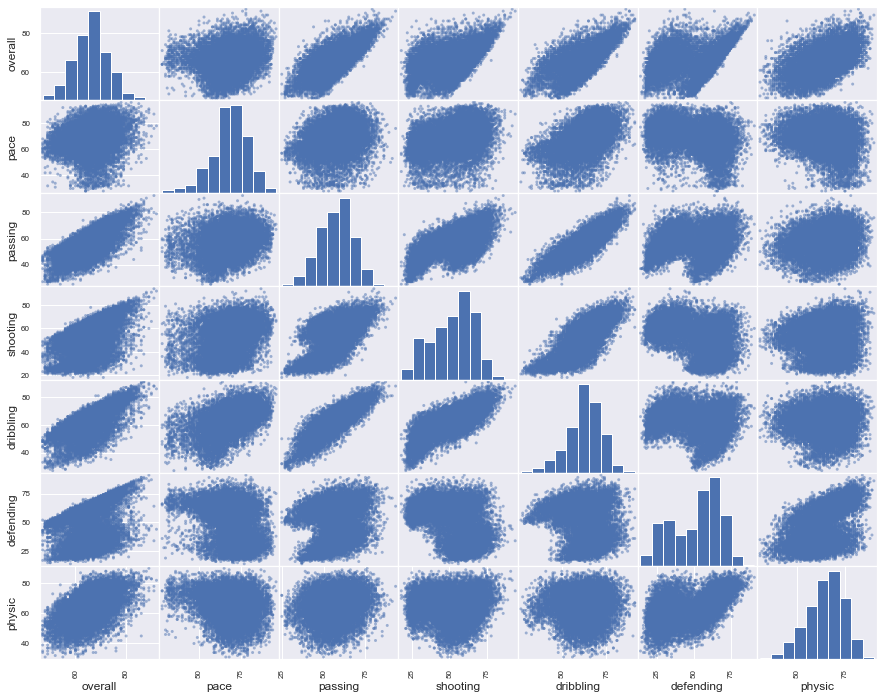

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(fifa_df, figsize=(15,12))
plt.show()

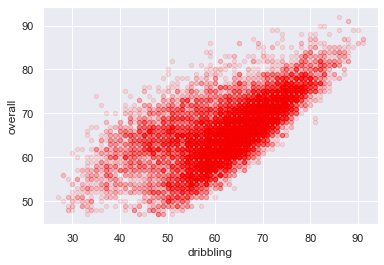

In [15]:
fifa_df.plot(kind = "scatter", x = "dribbling", y= "overall", alpha=0.1, color = "red")
plt.show()

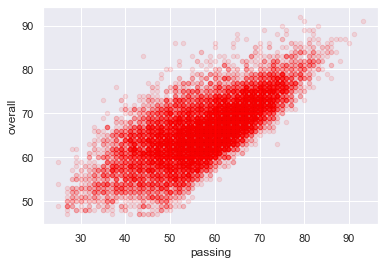

In [16]:
fifa_df.plot(kind = "scatter", x = "passing", y= "overall", alpha=0.1, color = "red")
plt.show()

These correlations are not the strongest, but lets see what we can do with them

## Preparing data for the ML algorithms

The `Y` lists contain the target values, the ones that we will be using to determine who is the player that we are trying to discover.

The `X` lists contain the rest of the data, all of the other values

In [17]:
y_train = train_set['overall']

X_train = train_set.drop("overall", axis=1)
X_train = X_train.drop("long_name", axis=1)

#---------------------------------------------------------------

y_test = test_set['overall']

X_test = test_set.drop("overall", axis=1)
X_test = X_test.drop("long_name", axis=1)

## Selecting a model and training it
First, let's try a linear regression model using `Scikit-learn`

## Training and selecting a model

I've decided to use the Random Forest model, Random forests are a type of machine learning algorithm that create a set of decision trees from a training dataset and then combine the predictions of each individual tree to create a final prediction.

A couple days ago I saw a paper where someone deciphered which conditions, weighs and techniques did they use, so they're no longer a `black-box`. Maybe you are reading this from the future and it is a common thing, but not now

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
from sklearn.metrics import mean_squared_error

y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4836637366570977

------------------

We checked the cross-validation scores for our models and it seems to be working good enough

In [20]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    
scores = cross_val_score(forest_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)

Scores: [1.24787243 1.34361888 1.25878775 1.29882629 1.32444539 1.28307132
 1.26567956 1.29410172 1.28913997 1.33414846]
Mean: 1.2939691776433462
Standard Deviation: 0.030556351396766802


## Fine-tune the model
Now that we have selected our model, it is time to fine-tune it.
In machine learning, fine tuning is the process of making small changes to the parameters of a model in order to improve its performance on a given task. (Thank you GPT-3 for writing this for me)


Fine tuning is very tedious work and can take a long time if the dataset is large. You may not even have time to explore many combinations. Instead of doing everything manually, there is an easier option that Scikit-Learn provides. (`GridSearchCV`).

In [21]:
from sklearn.model_selection import GridSearchCV


param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]


forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

##### When it is done, we can retrieve the best combination of parameters and estimator like this:

In [22]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [23]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

## Evaluate the Model on the Test Set
After training and playing with the parameters on our model, let's test it out with our testing set. The process is really similar, but this time we are specifying the best estimator for the final model.

In [24]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1.253254092814868

### 1.2560681982508177 is the score that we got, which is a really, really good one.
Let's try to compute a confidence interval and see how our model would do.

In [25]:
confidence = 0.95

squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(), scale = stats.sem(squared_errors) ))

array([1.21855748, 1.28701566])

---------------------

In [26]:
some_data = X_test.iloc[:30]
some_label = y_test.iloc[:30]

predictions = final_model.predict(some_data)
labels = list(some_label)
pl = []
ll = []
check = []

for p in predictions: pl.append(int(p))
for l in labels: ll.append(l)
            
for i in range(len(pl)):
    check.append(pl[i] - ll[i])

prediction_summary = pd.DataFrame({'Predicted overall': pl,'Real Overall': ll,'Error': check})
prediction_summary

,Predicted overall,Real Overall,Error
0,70,71,-1
1,61,61,0
2,70,70,0
3,61,62,-1
4,63,63,0
5,67,68,-1
6,71,71,0
7,71,72,-1
8,69,69,0
9,64,64,0


In [27]:
def overall_predictor(mylist):    
    new_df = pd.DataFrame(columns = statcolumns, data = [mylist])
    return final_model.predict(new_df)

--------------------------------

#### SQL AND PANDAS (EXTRACTING THE PLAYER NAME AND OVERALL BY HIS ATTRIBUTES)

In [28]:
from pandasql import sqldf



def find_name_player(mylist):
    sqlcolumns = ["s_pace","s_passing","s_shooting","s_dribbling","s_defending","s_physic"]
    sql_dataframe = pd.DataFrame(columns = sqlcolumns, data = [mylist])
    output = sqldf(
    """
    SELECT 
      long_name 
    FROM 
      player_data, 
      sql_dataframe
    WHERE 
      (
        sql_dataframe.s_pace = player_data.pace
        AND sql_dataframe.s_passing = player_data.passing
        AND sql_dataframe.s_shooting = player_data.shooting 
        AND sql_dataframe.s_dribbling = player_data.dribbling 
        AND sql_dataframe.s_defending = player_data.defending 
        AND sql_dataframe.s_physic = player_data.physic
      )
    """
    )
    return output.iloc[0,0]


def find_overall_player(mylist):
    sqlcolumns = ["s_pace","s_passing","s_shooting","s_dribbling","s_defending","s_physic"]
    sql_dataframe = pd.DataFrame(columns = sqlcolumns, data = [mylist])
    output = sqldf(
    """
    SELECT overall
    FROM 
      player_data, 
      sql_dataframe
    WHERE 
      (
        sql_dataframe.s_pace = player_data.pace
        AND sql_dataframe.s_passing = player_data.passing
        AND sql_dataframe.s_shooting = player_data.shooting 
        AND sql_dataframe.s_dribbling = player_data.dribbling 
        AND sql_dataframe.s_defending = player_data.defending 
        AND sql_dataframe.s_physic = player_data.physic
      )
    """
    )
    return output.iloc[0,0]

def input_stats():
    mylist = []
    for i in range(6):
        print("Please enter the", columns[i+2] ,"of your player")
        x = input()
        mylist.append(x)
    return mylist

-------------------------------------------------

# COMPLETE PLAYER PREDICTOR
### BY INTRODUCING THE SIX MAIN STATS OF A PLAYER, IT GUESSES ITS NAME AND OVERALL

In [36]:
example_list = [88,74,68,79,29,53] # ANSU FATI

mylist = input_stats()

Please enter the pace of your player


 88


Please enter the passing of your player


 68


Please enter the shooting of your player


 74


Please enter the dribbling of your player


 79


Please enter the defending of your player


 29


Please enter the physic of your player


 53


In [37]:
print("The predicted overall is:", float(overall_predictor(mylist)))
print("The real overall is:", (find_overall_player(mylist)))
print("Your player is:", find_name_player(mylist))

The predicted overall is: 76.2
The real overall is: 76
Your player is: Anssumane Fati
